<a href="https://colab.research.google.com/github/lucasnofear/Deep-Learning-with-Python-Practice/blob/Keras-and-Tensorflow/ch5_CNN_on_DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a small CNN to work on a relatively small data size to classify dog vs cat. (data and previous competition from Kaggle)

download the zip data file and save in /tmp/

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-28 16:35:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  30.7MB/s    in 2.1s    

2020-04-28 16:35:16 (30.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

The file is unziped into /tmp/cats_and_dogs_filtered and the folder contains the train and validation sets already.

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.998.jpg', 'cat.981.jpg', 'cat.371.jpg', 'cat.177.jpg', 'cat.461.jpg', 'cat.846.jpg', 'cat.676.jpg', 'cat.848.jpg', 'cat.534.jpg', 'cat.419.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Find out the total number of pictures in each set

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Build the network

In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Preprocessing the data

In [9]:
from keras.preprocessing.image import ImageDataGenerator

#rescale all image to 1/255
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# Fitting the model using a batch generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 99ms/step - loss: 0.6870 - acc: 0.5530 - val_loss: 0.6689 - val_acc: 0.6220
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6410 - acc: 0.6360 - val_loss: 0.6651 - val_acc: 0.5810
Epoch 3/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6044 - acc: 0.6715 - val_loss: 0.6777 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5621 - acc: 0.7105 - val_loss: 0.6057 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5266 - acc: 0.7370 - val_loss: 0.6587 - val_acc: 0.7180
Epoch 6/30
100/100 [==============================] - 8s 80ms/step - loss: 0.4995 - acc: 0.7600 - val_loss: 0.4098 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 8s 79ms/step - loss: 0.4717 - acc: 0.7695 - val_loss: 0.7657 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 8s 79ms/step -

In [0]:
# saving the model
model.save('cats_and_dogs_small_1.h5')

In [12]:
# check if I am using GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [13]:
# check which GPU I am using
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5538930436188708429, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10600720755901419364
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12569567037600331543
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3174856097150446942
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [14]:
# check working directory
!ls

cats_and_dogs_small_1.h5  sample_data


The model is run on a CPU which takes around 104s for each epoch.
run on GPU takes 9s each epoch.

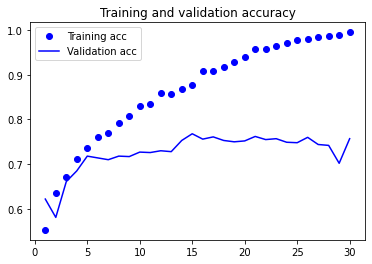

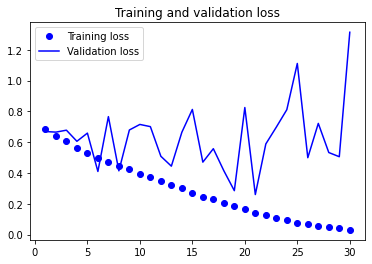

In [15]:
# display the accuracy and loss during training.
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Using data augmentation to counter the overfitting, which is a commonly used techniques for image data.

In [0]:
# set up a data augmentation configuration using ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

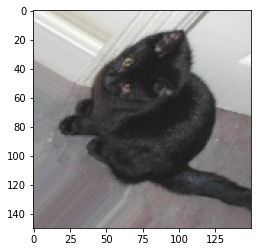

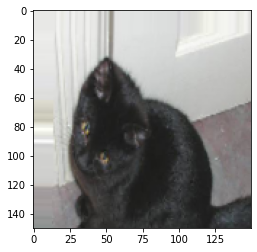

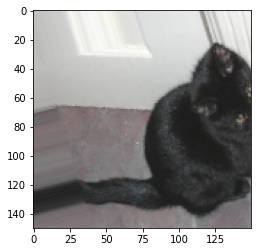

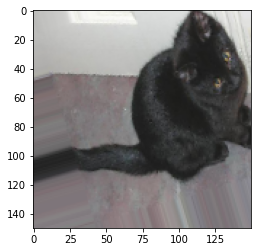

In [17]:
# Display some randomly augmented training images
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]  # chooses one image
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)  # converts to Numpy array
x = x.reshape((1,) + x.shape) # reshape to (1, 150, 150, 3)

# Generate batches of randomly transformed images indefinetly. need break.
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 ==0:
    break

plt.show()

Furthermore, Use dropout layers for overfitting

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Train the convnet using data-augmentation generators

In [19]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # validation data is not augmented.

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 28s 277ms/step - loss: 0.6931 - acc: 0.5082 - val_loss: 0.7760 - val_acc: 0.4988
Epoch 2/30
100/100 [==============================] - 25s 252ms/step - loss: 0.6814 - acc: 0.5641 - val_loss: 0.6594 - val_acc: 0.6174
Epoch 3/30
100/100 [==============================] - 26s 256ms/step - loss: 0.6693 - acc: 0.5961 - val_loss: 0.7058 - val_acc: 0.5808
Epoch 4/30
100/100 [==============================] - 25s 251ms/step - loss: 0.6574 - acc: 0.6073 - val_loss: 0.4908 - val_acc: 0.6307
Epoch 5/30
100/100 [==============================] - 24s 241ms/step - loss: 0.6341 - acc: 0.6410 - val_loss: 0.5533 - val_acc: 0.6894
Epoch 6/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6251 - acc: 0.6429 - val_loss: 0.5376 - val_acc: 0.7052
Epoch 7/30
100/100 [==============================] - 25s 251ms/step - loss: 0.6065 - acc: 0.6667 - val_lo

In [0]:
model.save('cats_and_dogs_small_2.h5')

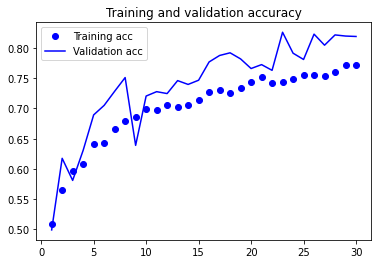

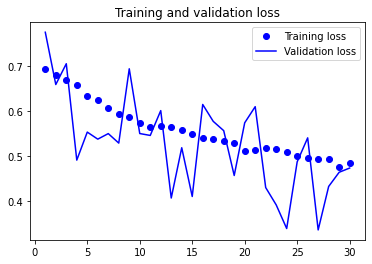

In [21]:
# display the accuracy and loss during training.
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We improved accuracy from the previous model by using data augmentation and drop-out.To further improve the result, we can incorporate a pre-trained model on a larger and general dataset, and reuse the convnet on our problem. 

Here we use the VGG16.

In [22]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Fast Feature Extraction

In [26]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)

# flatten 
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
# define and train a densely connected classifier
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 276us/step - loss: 0.6249 - acc: 0.6430 - val_loss: 0.4432 - val_acc: 0.8350
Epoch 2/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.4318 - acc: 0.8035 - val_loss: 0.3680 - val_acc: 0.8550
Epoch 3/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.3613 - acc: 0.8465 - val_loss: 0.3305 - val_acc: 0.8700
Epoch 4/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.3142 - acc: 0.8745 - val_loss: 0.3109 - val_acc: 0.8780
Epoch 5/30
2000/2000 [==============================] - 0s 226us/step - loss: 0.2870 - acc: 0.8840 - val_loss: 0.2960 - val_acc: 0.8860
Epoch 6/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.2646 - acc: 0.8925 - val_loss: 0.2874 - val_acc: 0.8780
Epoch 7/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.2489 - acc: 0.9020 - val_loss: 0.2876 - val_acc: 0.8720


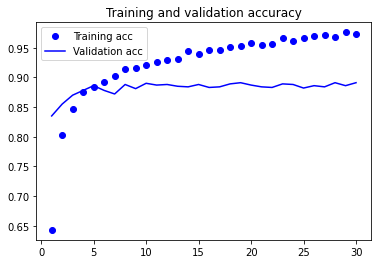

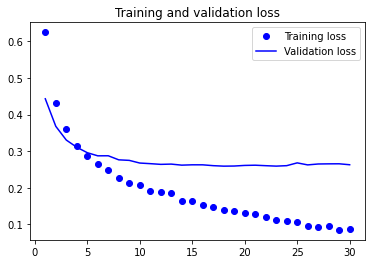

In [28]:
# Plot the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train very fast, but still have overfitting. Next, try use data augmentation. 

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


The convolutional base of VGG16 has 14,714,688 parameters. We will freeze the CONV layer to prevent the weights from updating, which will destroy the representations learned. 

In [31]:
print('This is the number of trainable weights',
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [33]:
print('This is the number of trainable weights',
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [34]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # validation data is not augmented.

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 19s 190ms/step - loss: 0.5892 - acc: 0.6960 - val_loss: 0.4112 - val_acc: 0.7810
Epoch 2/30
100/100 [==============================] - 17s 172ms/step - loss: 0.4789 - acc: 0.8000 - val_loss: 0.3193 - val_acc: 0.8290
Epoch 3/30
100/100 [==============================] - 17s 172ms/step - loss: 0.4299 - acc: 0.8110 - val_loss: 0.4176 - val_acc: 0.8560
Epoch 4/30
100/100 [==============================] - 17s 172ms/step - loss: 0.4120 - acc: 0.8105 - val_loss: 0.4670 - val_acc: 0.8570
Epoch 5/30
100/100 [==============================] - 17s 171ms/step - loss: 0.3812 - acc: 0.8280 - val_loss: 0.3893 - val_acc: 0.8670
Epoch 6/30
100/100 [==============================] - 17s 169ms/step - loss: 0.3796 - acc: 0.8305 - val_loss: 0.2960 - val_acc: 0.8720
Epoch 7/30
100/100 [==============================] - 17s 171ms/

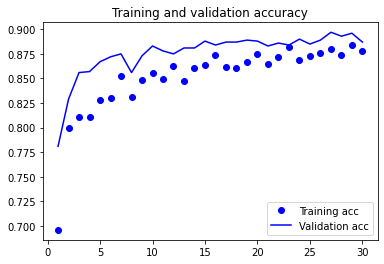

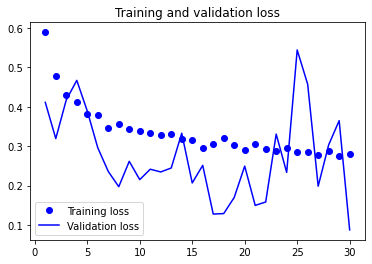

In [35]:
# Plot the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Fine-tunning. allow the top layers of conv to update (high-level features). 


In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 19s 192ms/step - loss: 0.2831 - acc: 0.8750 - val_loss: 0.5900 - val_acc: 0.9090
Epoch 2/100
100/100 [==============================] - 18s 175ms/step - loss: 0.2526 - acc: 0.8930 - val_loss: 0.1867 - val_acc: 0.9110
Epoch 3/100
100/100 [==============================] - 18s 177ms/step - loss: 0.2468 - acc: 0.9005 - val_loss: 0.1673 - val_acc: 0.9220
Epoch 4/100
100/100 [==============================] - 17s 174ms/step - loss: 0.2203 - acc: 0.9015 - val_loss: 0.4471 - val_acc: 0.9280
Epoch 5/100
100/100 [==============================] - 17s 174ms/step - loss: 0.1904 - acc: 0.9245 - val_loss: 0.1731 - val_acc: 0.9210
Epoch 6/100
100/100 [==============================] - 18s 176ms/step - loss: 0.1950 - acc: 0.9235 - val_loss: 0.0945 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 18s 176ms/step - loss: 0.1852 - acc: 0.9270 - val_loss: 0.2491 - val_acc: 0.9340
Epoch 8/100
100/100 [===========================

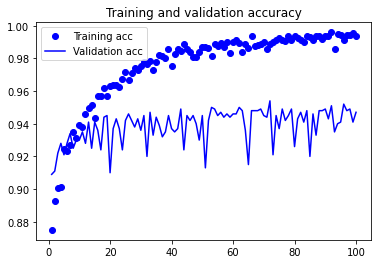

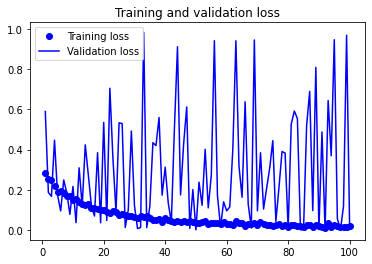

In [38]:
# Plot the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

With fine-tuning, we get 94% validation accuracy.